In [1]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
pd.options.mode.chained_assignment = None

dataDir = Path.cwd().parent.parent/'Data/processed'
usecols1 = ['id', 'Gigacow_Cow_Id', 'BreedName', 'problematic']
usecols = ['id', 'Gigacow_Cow_Id', 'BreedName', 'label']

problematic_dataset = pd.read_csv(dataDir/"Cow_Prob_dataset_L1.csv", index_col="id", usecols=usecols1)
problematic_dataset.drop_duplicates(subset=['Gigacow_Cow_Id'], inplace=True)
problematic_dataset.rename(columns={"problematic": "label"}, inplace=True)

prolonged_problematic_dataset = pd.read_csv(dataDir/"prolonged_problematic_targetCows/cow_total/Cow_prolonged_problematic_dataset_L1_L2.csv", index_col="id", usecols=usecols)
prolonged_problematic_dataset.drop_duplicates(subset=['Gigacow_Cow_Id'], inplace=True)

#analysis on prolonged_problematic&problematic problem
prolonged_problematic_list = list(prolonged_problematic_dataset.Gigacow_Cow_Id)
problematic_list = list(problematic_dataset.Gigacow_Cow_Id)

association_cow_list = list(set(prolonged_problematic_list) & set(problematic_list))


In [26]:
# save a list of cow data for problematic problems 
cow_dict = dict()
problematic_list = []
prolonged_problematic_list = []

for i, cow_id in enumerate(association_cow_list):
    problematic_label = int(problematic_dataset.loc[problematic_dataset.Gigacow_Cow_Id == cow_id].label)
    prolonged_problematic_label = int(prolonged_problematic_dataset.loc[prolonged_problematic_dataset.Gigacow_Cow_Id == cow_id].label)
    problematic_list.append(problematic_label)
    prolonged_problematic_list.append(prolonged_problematic_label)
    cow_dict[cow_id] = str(problematic_label)+str(prolonged_problematic_label)

print("num of cows: ", len(cow_dict))
print("info: ", cow_dict)

# collection the key-value pairs from the cow dict
#Haoyuan, this look wrong. Going through the list of cows and comparing it to the PDF of problematic cows it look like L1 cows it look like 0 corresponds to normal in L1. SO I changed this
collection_labels = list(cow_dict.values())
labels = list(Counter(collection_labels).keys())
num = list(Counter(collection_labels).values())
print("The label of cow dict: ", labels)
print("The amount of labels: ", num)
# map the label with explainable text
names = { '00':"Normal in L1 Normal in L2", '10':"Problematic in L1 Normal in L2", '01':"Normal in L1 Problematic in L2", '11':"Problematic in L1 and Problematic in L2"}
labels = [x if x not in names else names[x] for x in names]
print(labels)

num of cows:  55
info:  {2560: '00', 769: '00', 6018: '10', 3718: '01', 5767: '00', 2702: '00', 151: '00', 5147: '01', 2844: '01', 4765: '00', 1181: '01', 1057: '01', 6434: '11', 2979: '10', 550: '11', 5160: '00', 2090: '00', 4525: '00', 943: '00', 3890: '00', 2742: '00', 3447: '00', 1985: '00', 708: '00', 3657: '10', 74: '00', 2251: '01', 1738: '00', 4939: '00', 2510: '00', 1103: '00', 4176: '00', 1744: '10', 2517: '10', 5846: '00', 2135: '10', 5465: '00', 603: '01', 5852: '00', 478: '01', 5088: '01', 6241: '00', 4195: '00', 5092: '00', 2278: '00', 2792: '00', 6127: '00', 5616: '01', 1905: '00', 5235: '00', 2805: '00', 3446: '00', 5239: '01', 3705: '00', 4990: '00'}
The label of cow dict:  ['00', '10', '01', '11']
The amount of labels:  [36, 6, 11, 2]
['Normal in L1 Normal in L2', 'Problematic in L1 Normal in L2', 'Normal in L1 Problematic in L2', 'Problematic in L1 and Problematic in L2']


C:\Users\tokm0001\AppData\Local\Temp\ipykernel_908\2044948700.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  problematic_label = int(problematic_dataset.loc[problematic_dataset.Gigacow_Cow_Id == cow_id].label)
C:\Users\tokm0001\AppData\Local\Temp\ipykernel_908\2044948700.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  prolonged_problematic_label = int(prolonged_problematic_dataset.loc[prolonged_problematic_dataset.Gigacow_Cow_Id == cow_id].label)


In [27]:
num

[36, 6, 11, 2]

[36, 6, 11, 2]
['Normal in L1 Normal in L2', 'Problematic in L1 Normal in L2', 'Normal in L1 Problematic in L2', 'Problematic in L1 and Problematic in L2']


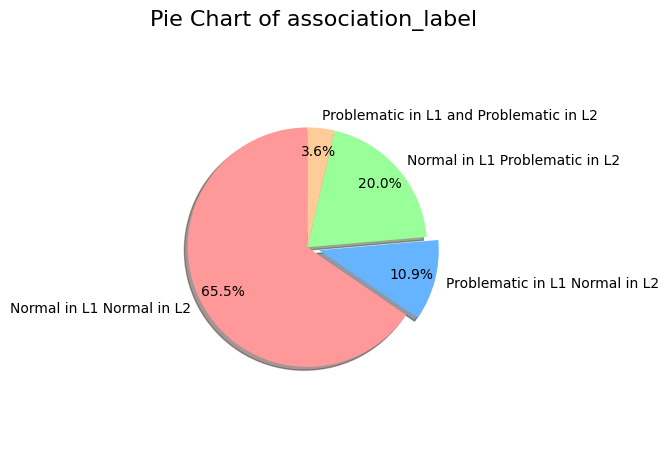

In [28]:
# plot the consist of labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

print(num)
print(labels)
fig1, ax1 = plt.subplots()
ax1.pie(num, colors=colors, startangle=90,
        explode=[0, 0.1, 0, 0], labels=labels,  # Adjust explode list to match the length of num and labels
        shadow=True, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
ax1.axis('equal')

#plt.legend(fontsize=12)
plt.title("Pie Chart of association_label", fontsize=16)
plt.tight_layout()

plt.show()

In [38]:
problematic_select = problematic_dataset.loc[problematic_dataset.Gigacow_Cow_Id.isin(association_cow_list)]
problematic_select.rename(columns={"label":"problematic_label"}, inplace=True)
prolonged_problematic_select = prolonged_problematic_dataset.loc[prolonged_problematic_dataset.Gigacow_Cow_Id.isin(association_cow_list)]
prolonged_problematic_select.rename(columns={"label":"prolonged_problematic_label"}, inplace=True)

association_cows = problematic_select.merge(prolonged_problematic_select, how='left', left_on=['Gigacow_Cow_Id', 'BreedName'], right_on=['Gigacow_Cow_Id', 'BreedName'])
association_cows

,Gigacow_Cow_Id,BreedName,problematic_label,prolonged_problematic_label
0,2560,1,0,0
1,5147,1,0,1
2,1057,2,0,1
3,550,2,1,1
4,5160,1,0,0
5,2090,2,0,0
6,3657,2,1,0
7,74,1,0,0
8,1103,2,0,0
9,4176,1,0,0


In [55]:
breed_1_label = ['Problematic in L1 Problematic in L2', 'Problematic in L1 Normal in L2']
breed_2_label = {
    '11': "Problematic in L1, \nproblematic in L2",
    '01': "Normal in L1, \nproblematic in L2",
    '10': "Problematic in L1, \nnormal in L2",
    '00': "Normal in L1, \nnormal in L2"
}
association_cows["problematic_prolonged_problematic_label"] = association_cows.problematic_label.astype(str) + association_cows.prolonged_problematic_label.astype(str)
cow_Breed_1 = association_cows.loc[association_cows.BreedName == 1].copy()
cow_Breed_2 = association_cows.loc[association_cows.BreedName == 2].copy()
cow_Breed_1_counter = cow_Breed_1.problematic_prolonged_problematic_label.value_counts().reset_index(name='Sum of problematic_prolonged_problematic_label').copy()
cow_Breed_2_counter = cow_Breed_2.problematic_prolonged_problematic_label.value_counts().reset_index(name='Sum of problematic_prolonged_problematic_label').copy()

In [56]:
cow_Breed_2_counter

,problematic_prolonged_problematic_label,Sum of problematic_prolonged_problematic_label
0,00,17
1,01,5
2,10,4
3,11,2


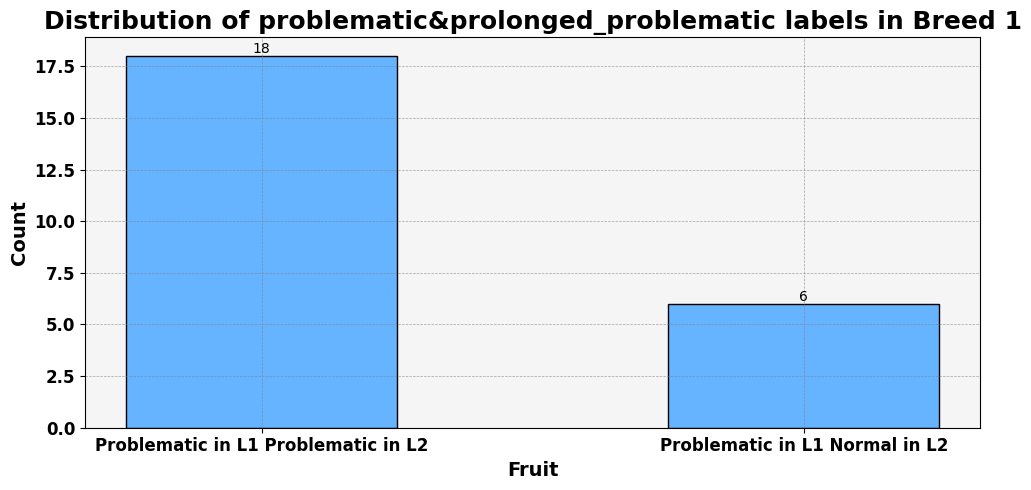

In [57]:
fig, ax = plt.subplots(figsize=(10,5))

bars = ax.bar(breed_1_label, cow_Breed_1_counter['Sum of problematic_prolonged_problematic_label'], color='#66b3ff', edgecolor='black', width=0.5)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, yval, ha='center', va='bottom')

ax.set_facecolor('whitesmoke')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_title("Distribution of problematic&prolonged_problematic labels in Breed 1", fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax.set_ylabel("Count", fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

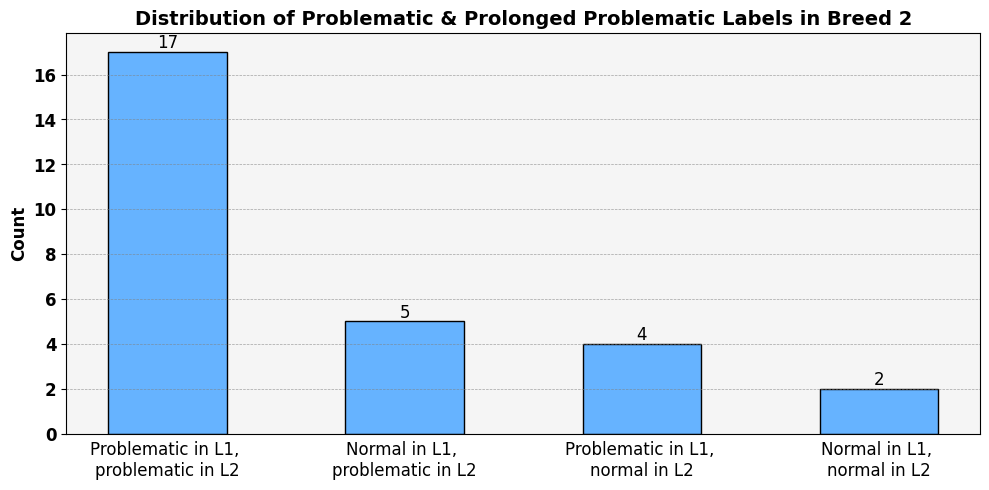

In [70]:
fig, ax = plt.subplots(figsize=(10,5))

x_labels = [breed_2_label[label] for label in breed_2_label.keys()]

bars = ax.bar(breed_2_label.keys(), cow_Breed_2_counter['Sum of problematic_prolonged_problematic_label'], color='#66b3ff', edgecolor='black', width=0.5)

label_padding = 0.02  # Adjust the padding factor to fine-tune the label position

for bar, label in zip(bars, x_labels):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, yval, ha='center', va='bottom', fontsize=12)
    label_height = -label_padding * max(cow_Breed_2_counter['Sum of problematic_prolonged_problematic_label'])
    ax.text(bar.get_x() + bar.get_width() / 2.0, label_height, label, ha='center', va='top', fontsize=12, rotation=0)

ax.set_facecolor('whitesmoke')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_title("Distribution of Problematic & Prolonged Problematic Labels in Breed 2", fontsize=14, fontweight='bold')
ax.set_ylabel("Count", fontsize=12, fontweight='bold')

plt.xticks([])  # Hide x-axis ticks

plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [59]:
problematic_dataset.loc[problematic_dataset.label == 1].value_counts("BreedName")

BreedName
2     20
99    12
4      9
1      4
Name: count, dtype: int64